In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Business Understanding



- Objective :Predictive Time Series
- Jenis Algoritma: supervised learning
- Judul : Predictive Stok Akhir Gandum Dunia Sebagai Bentuk Perencanaan dan Pengendalian Produksi Menggunakan Pemodelan Time Series
- Algoritma:
1. Model Exponential Smoothing



# Data Understanding

In [ ]:
url =' '
data = pd.read_excel(url)
data

,Year,Area Harvested,Yield,Production,Feed use,Domestic Disappearance,Exports,Ending Stocks
0,1960,202.200,1.15,233.451,29.977,230.880,43.857,82.849
1,1961,203.458,1.08,220.049,33.275,233.141,46.949,69.850
2,1962,206.878,1.19,246.780,29.958,240.784,46.227,75.846
3,1963,206.307,1.12,230.387,23.646,235.906,58.265,70.327
4,1964,215.940,1.23,264.911,33.606,256.759,54.869,78.479
...,...,...,...,...,...,...,...,...
59,2019,215.681,3.53,761.318,139.466,746.419,194.558,298.774
60,2020,220.643,3.51,774.900,163.407,788.174,203.451,285.500
61,2021,221.409,3.52,780.291,160.978,793.121,202.980,272.670
62,2022,220.299,3.58,788.264,156.102,794.651,215.236,266.283


# Data Preparation

In [ ]:
#Membuat Data Frame
df=pd.DataFrame(data)
df.head()

,Year,Area Harvested,Yield,Production,Feed use,Domestic Disappearance,Exports,Ending Stocks
0,1960,202.200,1.15,233.451,29.977,230.880,43.857,82.849
1,1961,203.458,1.08,220.049,33.275,233.141,46.949,69.850
2,1962,206.878,1.19,246.780,29.958,240.784,46.227,75.846
3,1963,206.307,1.12,230.387,23.646,235.906,58.265,70.327
4,1964,215.940,1.23,264.911,33.606,256.759,54.869,78.479


In [ ]:
df_a = df[['Year', 'Ending Stocks']]
df_a.head()

,Year,Ending Stocks
0,1960,82.849
1,1961,69.850
2,1962,75.846
3,1963,70.327
4,1964,78.479


In [ ]:
# Menjadikan Year sebagai index
df_1 = df[['Year', 'Ending Stocks']]
df_1.set_index('Year', inplace=True)

<Axes: xlabel='Year'>

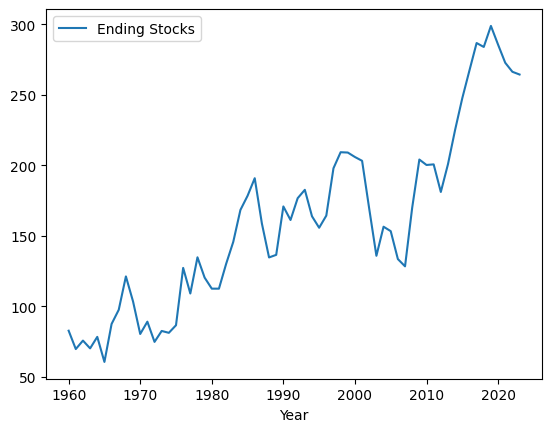

In [ ]:
df_1.plot()

In [ ]:
# mempersiapkan data untuk melakukan dekompose
# diperlukan untuk mengetahui pola trend atau seasonal data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing as HWES

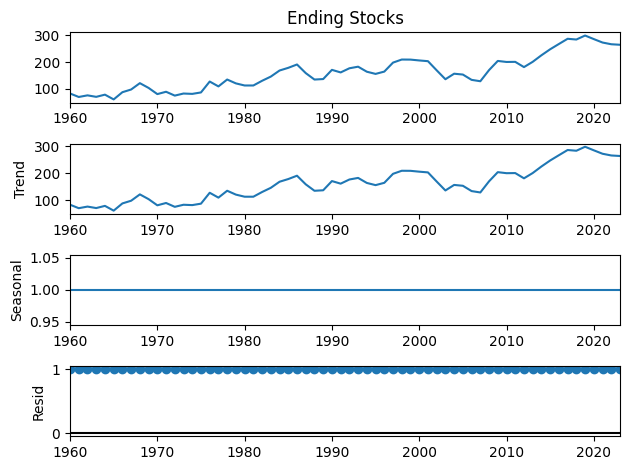

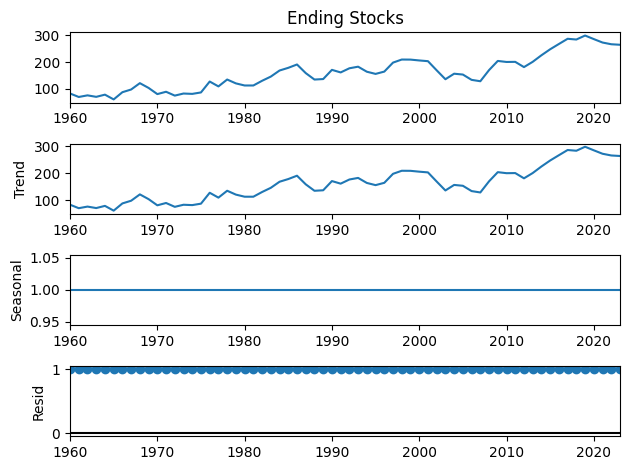

In [ ]:
result_1 = seasonal_decompose(df_1['Ending Stocks'], model = 'multiplicative', period=1)
result_1.plot()

In [ ]:
df_2 = df[['Year', 'Production']]
df_2.head()

,Year,Production
0,1960,233.451
1,1961,220.049
2,1962,246.780
3,1963,230.387
4,1964,264.911


In [ ]:
# Menjadikan Year sebagai index
df_2.set_index('Year', inplace=True)

<Axes: xlabel='Year'>

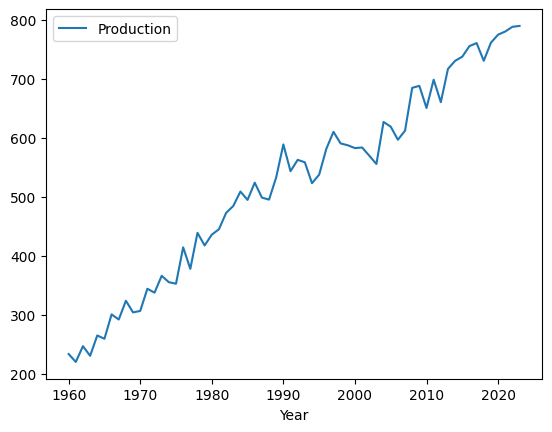

In [ ]:
df_2.plot()

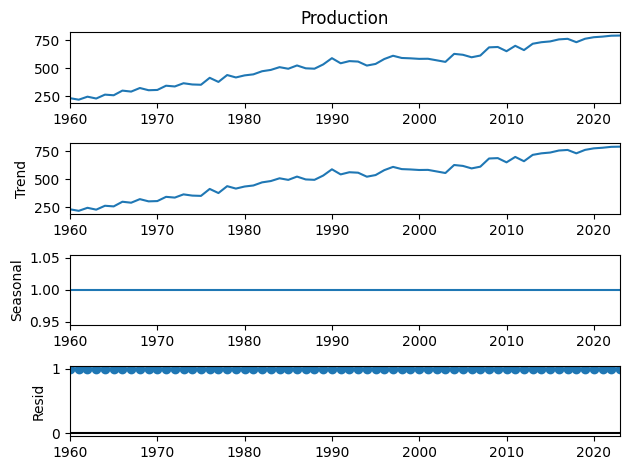

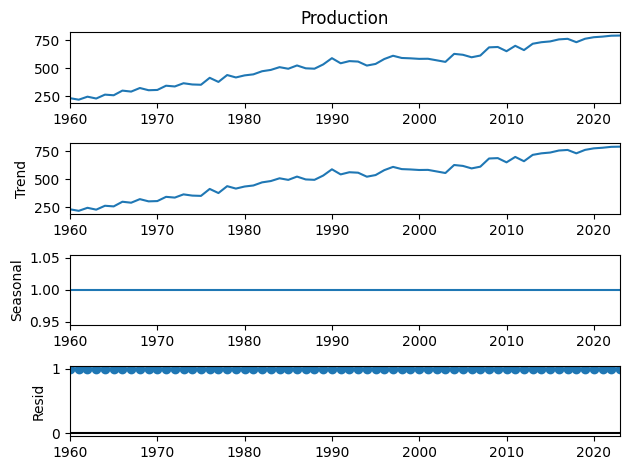

In [ ]:
result_2 = seasonal_decompose(df_2['Production'], model = 'multiplicative', period=1)
result_2.plot()

- Karena tidak terdapat unsur seasonal maka dapat menggunakan algoritma Holt's Exponential Smoothing

# Modelling Holt Winters (Ending Stocks)

In [ ]:
# SPLIT Data
df_train_1 = df_1.iloc[:len(df_1)-8]
df_test_1 = df_1.iloc[len(df_1)-8:]

In [ ]:
df_train_1 = df_a[df_a['Year'] <= 2015 ]
df_test_1 = df_a[df_a['Year'] > 2015 ]

In [ ]:
# Memodelkan data dengan Holt's method
model_1 = Holt(df_a['Ending Stocks'])
result_model_1 = model_1.fit()
result_model_1.summary()

Dep. Variable:,Ending Stocks,No. Observations:,64
Model:,Holt,SSE,21098.241
Optimized:,True,AIC,379.076
Trend:,Additive,BIC,387.711
Seasonal:,None,AICC,380.550
Seasonal Periods:,None,Date:,"Tue, 06 Jun 2023"
Box-Cox:,False,Time:,09:45:56
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
start = len(df_train_1)
end = len(df_train_1)+len(df_test_1)-1

In [ ]:
forecast1 = result_model_1.predict(start, end).rename('Predictions_a')
forecast1

56    250.47286
57    270.12986
58    289.53986
59    286.75586
60    301.65486
61    288.38086
62    275.55086
63    269.16386
Name: Predictions_a, dtype: float64

<Axes: >

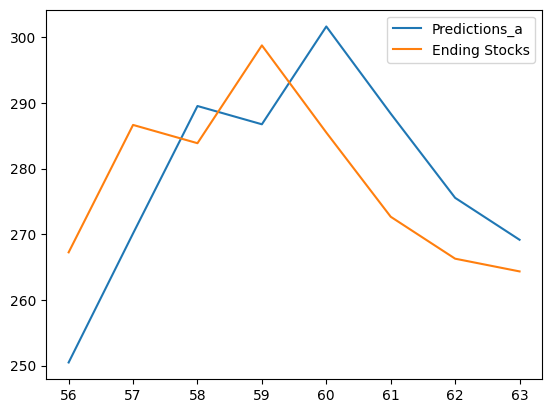

In [ ]:
# Plot Prediksi VS Aktual
forecast1.plot(legend=True)
df_test_1['Ending Stocks'].plot(legend=True)

## Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# menghitung root
rmse(df_test_1['Ending Stocks'], forecast1)

12.981297108734307

In [ ]:
# MAPE
mean_absolute_percentage_error(df_test_1['Ending Stocks'], forecast1)

0.0434819972635682

## Forecasting

In [ ]:
# Forecast untuk 5 tahun kedepan
forecast = result_model_1.predict(start = len(df_1),
                          end = (len(df_1)-1) + 5).rename('Forecast')

In [ ]:
forecast

64    267.224860
65    270.105721
66    272.986581
67    275.867441
68    278.748301
Name: Forecast, dtype: float64

In [ ]:
from google.colab import files

# forecast.to_excel('HasilForecastBinder.xlsx')
# files.download('HasilForecastBinder.xlsx')

# Modelling Holt Winters (Production)

In [ ]:
# SPLIT Data
df_train_2 = df_2.iloc[:len(df_1)-8]
df_test_2 = df_2.iloc[len(df_1)-8:]

In [ ]:
# Memodelkan data dengan Holt's method
model_2 = Holt(df_2['Production'])
result_model_2 = model_2.fit()
result_model_2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Production,No. Observations:,64
Model:,Holt,SSE,35798.695
Optimized:,True,AIC,412.914
Trend:,Additive,BIC,421.550
Seasonal:,None,AICC,414.388
Seasonal Periods:,None,Date:,"Tue, 06 Jun 2023"
Box-Cox:,False,Time:,09:46:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3357607,alpha,True
smoothing_trend,0.000000,beta,True


In [ ]:
start = len(df_train_2)
end = len(df_train_2)+len(df_test_2)-1

In [ ]:
forecast2 = result_model_2.predict(start, end).rename('Predictions_b')
forecast2

Year
2016    738.552082
2017    753.350026
2018    764.880030
2019    762.462870
2020    771.152727
2021    781.485173
2022    790.158476
2023    798.596645
Name: Predictions_b, dtype: float64

<Axes: xlabel='Year'>

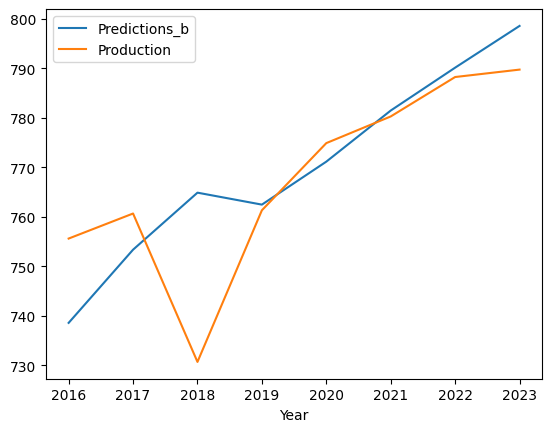

In [ ]:
# Plot Prediksi VS Aktual
forecast2.plot(legend=True)
df_test_2['Production'].plot(legend=True)

## Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
# menghitung root
rmse(df_test_2['Production'], forecast2)

14.203114834956562

In [ ]:
# MAPE
mean_absolute_percentage_error(df_test_2['Production'], forecast2)

0.012559364304805472

## Forecasting

In [ ]:
# Forecast untuk 5 tahun kedepan
forecast = result_model_2.predict(start = len(df_2),
                          end = (len(df_2)-1) + 5).rename('Forecast')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast

64    804.705249
65    813.779508
66    822.853768
67    831.928027
68    841.002286
Name: Forecast, dtype: float64